# Importing necessary libraries

In [1]:
import numpy as np # numeric computations
import pandas as pd # data processing
import matplotlib.pyplot as plt # plotting graphs
import warnings # warnings
%matplotlib inline # to display the plots displayed inline within Jupyter notebook
plt.style.use('seaborn') # Chaning the plot style
warnings.filterwarnings("ignore") # to ignore any warnings

UsageError: unrecognized arguments: # to display the plots displayed inline within Jupyter notebook


Group Members:
1. Akshay - 1711036
2. Girish - 1711059
3. Arghyadeep - 
4. Mihir -
5. Kaustabh -
6. Abdeali -

# Loading the dataset

In [2]:
# Loading the IMDB dataset into pandas dataframe
df_movies = pd.read_csv('/content/movies.csv') # reading movies.csv file
df_ratings = pd.read_csv('/content/ratings.csv') # reading ratings.csv file

# Exploratory Data Analysis (EDA)

EDA involves looking at and describing the data set from various angles and then summarizing it. It is helpful in analyzing the distribution and statistics of our data.

In [3]:
# shape attribute tells us a number of tuples and feature variables in our dataset
print("Shape of df_movies: ", df_movies.shape)
print("Shape of df_ratings: ", df_ratings.shape)

Shape of df_movies:  (10329, 3)
Shape of df_ratings:  (105339, 4)


In [4]:
# print top 10 rows of dataframe - movies
df_movies.head(10)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [5]:
# print top 10 rows of dataframe - ratings
df_ratings.head(10)

,userId,movieId,rating,timestamp
0,1,16,4.0,1217897793
1,1,24,1.5,1217895807
2,1,32,4.0,1217896246
3,1,47,4.0,1217896556
4,1,50,4.0,1217896523
5,1,110,4.0,1217896150
6,1,150,3.0,1217895940
7,1,161,4.0,1217897864
8,1,165,3.0,1217897135
9,1,204,0.5,1217895786


So, rating dataset has
1. userId - unique for each user
2. movieId - we can take the title of the movie from movies dataset
3. rating - Ratings given by each user to all the movies

In [6]:
# df.info() function is used to get a concise summary of the dataframe
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10329 entries, 0 to 10328
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  10329 non-null  int64 
 1   title    10329 non-null  object
 2   genres   10329 non-null  object
dtypes: int64(1), object(2)
memory usage: 242.2+ KB


In [7]:
df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105339 entries, 0 to 105338
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     105339 non-null  int64  
 1   movieId    105339 non-null  int64  
 2   rating     105339 non-null  float64
 3   timestamp  105339 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.2 MB


In [8]:
# get the statistical summary of dataframe (exclude any object-type variables)
# df.describe() tells us about statistical details like percentile, mean, std deviation, etc.
df_movies.describe(exclude='object')

,movieId
count,10329.000000
mean,31924.282893
std,37734.741149
min,1.000000
25%,3240.000000
50%,7088.000000
75%,59900.000000
max,149532.000000


In [9]:
df_ratings.describe()

,userId,movieId,rating,timestamp
count,105339.000000,105339.000000,105339.000000,1.053390e+05
mean,364.924539,13381.312477,3.516850,1.130424e+09
std,197.486905,26170.456869,1.044872,1.802660e+08
min,1.000000,1.000000,0.500000,8.285650e+08
25%,192.000000,1073.000000,3.000000,9.711008e+08
50%,383.000000,2497.000000,3.500000,1.115154e+09
75%,557.000000,5991.000000,4.000000,1.275496e+09
max,668.000000,149532.000000,5.000000,1.452405e+09


In [10]:
# getting the number of movies under each genre
genrewise_movies_count = {}
for genres in df_movies["genres"]:
  for genre in genres.split("|"):
    genrewise_movies_count[genre] = genrewise_movies_count.get(genre, 0) + 1

print("Number of unique genres: ", len(list(genrewise_movies_count)))
genrewise_movies_count

Number of unique genres:  20


{'(no genres listed)': 7,
 'Action': 1737,
 'Adventure': 1164,
 'Animation': 401,
 'Children': 540,
 'Comedy': 3515,
 'Crime': 1440,
 'Documentary': 415,
 'Drama': 5220,
 'Fantasy': 670,
 'Film-Noir': 195,
 'Horror': 1001,
 'IMAX': 152,
 'Musical': 409,
 'Mystery': 675,
 'Romance': 1788,
 'Sci-Fi': 860,
 'Thriller': 2187,
 'War': 503,
 'Western': 235}

## Data Visualisation

### Barplot of Genres vs No. of movies

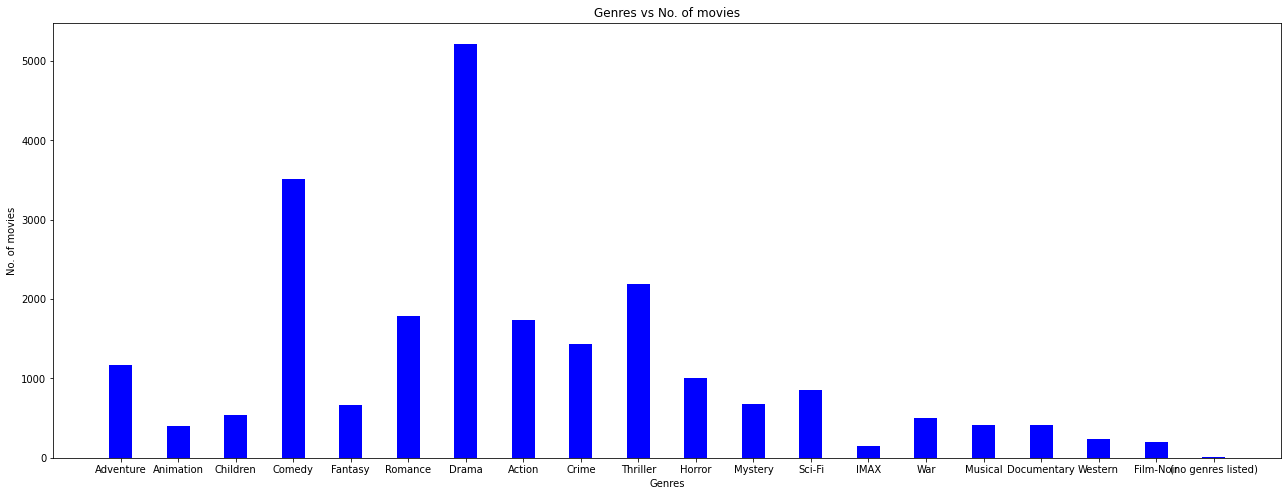

In [11]:
# Barplot of Genres vs No. of movies
genres = list(genrewise_movies_count.keys())
counts = list(genrewise_movies_count.values())

fig = plt.figure(figsize = (22, 8))
 
# creating the bar plot
plt.bar(genres, counts, color ='blue', width = 0.4) 
plt.xlabel("Genres")
plt.ylabel("No. of movies")
plt.title("Genres vs No. of movies")
plt.show()

Analysis : A large number of movies come under Drama and Comedy genre. Some movies are not listed in any genre.

### Scatter plot for MovieId vs Number of users voted

In [12]:
number_of_users_voted = df_ratings.groupby('movieId')['rating'].agg('count')
number_of_movies_voted = df_ratings.groupby('userId')['rating'].agg('count')

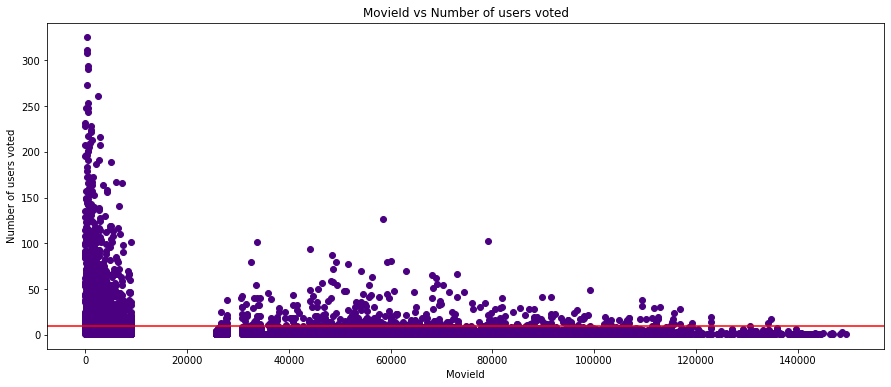

In [13]:
fig = plt.figure(figsize = (15, 6))
plt.scatter(number_of_users_voted.index, number_of_users_voted, color='indigo')
plt.axhline(y = 10, color = 'r')
plt.xlabel('MovieId')
plt.ylabel('Number of users voted')
plt.title('MovieId vs Number of users voted')
plt.show()

**Analysis : Movies with MovieId 0 to 500 are being voted by more number of user**

In [14]:
# Merge both the datasets
df = pd.merge(df_movies, df_ratings, on = 'movieId')
print(df.shape)
df.head(10)

(105339, 6)


,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,2,5.0,859046895
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,1303501039
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,8,5.0,858610933
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,11,4.0,850815810
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,14,4.0,851766286
5,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,5.0,1350206819
6,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,28,3.0,884098350
7,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,29,4.0,846942580
8,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,30,4.5,1292690069
9,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,31,4.0,832397496


In [15]:
# Groupby all movie titles together and find their mean ratings
# average rating of each movie.
df.groupby('title')['rating'].mean().head()

title
'71 (2014)                                 3.500
'Hellboy': The Seeds of Creation (2004)    3.000
'Round Midnight (1986)                     2.500
'Til There Was You (1997)                  4.000
'burbs, The (1989)                         3.125
Name: rating, dtype: float64

The average ratings are not sorted. Sort the ratings in the descending order of their average ratings.

In [16]:
# Sort movies based on ratings from highest to lowest
df.groupby('title')['rating'].mean().sort_values(ascending = False)

title
Being Human (1993)                                   5.0
Three Ages (1923)                                    5.0
The Liberator (2013)                                 5.0
October Baby (2011)                                  5.0
Resident Evil: Retribution (2012)                    5.0
                                                    ... 
Day Night Day Night (2006)                           0.5
The Aztec Mummy Against the Humanoid Robot (1958)    0.5
Angels in America (2003)                             0.5
Blood of a Poet, The (Sang d'un poète, Le) (1930)    0.5
It's Pat (1994)                                      0.5
Name: rating, Length: 10323, dtype: float64

A movie can make it to the top of the  list even if only a single user has given it five stars rating. Thus, above stats can be misleading. Usually, a movie which is really a good one will receive a higher rating by a large number of users. So, we will look at the total number of ratings for movie.

In [17]:
df.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Pulp Fiction (1994)                 325
Forrest Gump (1994)                 311
Shawshank Redemption, The (1994)    308
Jurassic Park (1993)                294
Silence of the Lambs, The (1991)    290
Name: rating, dtype: int64

Now we can see some really good movies at the top. The above list supports our point that good movies normally receive higher ratings. Now we know that both the average rating per movie and the number of ratings per movie are important attributes. Let's create a new dataframe that contains both of these attributes.

## What is movie rating and how many users voted for this ?

In [18]:
# create a dataframe
data = pd.DataFrame(df.groupby('title')['rating'].mean())
data['rating_counts'] = pd.DataFrame(df['title'].value_counts())
data.head()

,rating,rating_counts
title,,
'71 (2014),3.500,1
'Hellboy': The Seeds of Creation (2004),3.000,1
'Round Midnight (1986),2.500,1
'Til There Was You (1997),4.000,3
"'burbs, The (1989)",3.125,20


## How many users have rated a given movie ?

In [19]:
df['title'].value_counts()

Pulp Fiction (1994)                           325
Forrest Gump (1994)                           311
Shawshank Redemption, The (1994)              308
Jurassic Park (1993)                          294
Silence of the Lambs, The (1991)              290
                                             ... 
Lie, The (2011)                                 1
Maniac (2012)                                   1
Page One: Inside the New York Times (2011)      1
Tony Rome (1967)                                1
Triumph of Love, The (2001)                     1
Name: title, Length: 10323, dtype: int64